In [0]:
from pyspark import SparkContext, SparkConf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import socket
import platform

In [0]:
conf = SparkConf().setAppName("151805026_MustafaGorkemUysal_BookRecommendation")
sc = SparkContext.getOrCreate(conf = conf)
sc.setCheckpointDir('checkpoint/')

In [0]:
def my_computer():
    try:
        host_name = socket.gethostname()
        host_ip = socket.gethostbyname(host_name)
        print("Hostname: ", host_name)
        print("IP Address: ", host_ip)
        print(platform.uname())
    except:
        print("Something went Wrong!")

In [0]:
my_computer()

Hostname:  LAPTOP-CP88LKBP
IP Address:  192.168.1.100
uname_result(system='Windows', node='LAPTOP-CP88LKBP', release='10', version='10.0.18362', machine='AMD64', processor='AMD64 Family 22 Model 48 Stepping 1, AuthenticAMD')


### Exploring Book Tags Dataset

In [0]:
raw_book_tags = sc.textFile('./book_tags.csv')
raw_book_tags.take(10)
# goodreads_book_id, tag_id, count

['1,30574,167697',
 '1,11305,37174',
 '1,11557,34173',
 '1,8717,12986',
 '1,33114,12716',
 '1,11743,9954',
 '1,14017,7169',
 '1,5207,6221',
 '1,22743,4974',
 '1,32989,4364']

In [0]:
book_tags_fields = raw_book_tags.map(lambda line: line.split(','))
book_tags_fields.take(10)

[['1', '30574', '167697'],
 ['1', '11305', '37174'],
 ['1', '11557', '34173'],
 ['1', '8717', '12986'],
 ['1', '33114', '12716'],
 ['1', '11743', '9954'],
 ['1', '14017', '7169'],
 ['1', '5207', '6221'],
 ['1', '22743', '4974'],
 ['1', '32989', '4364']]

In [0]:
num_books = book_tags_fields.map(lambda field: field[0]).distinct().count()
num_tags = book_tags_fields.map(lambda field: field[1]).distinct().count()
print('Number of Books: {}, Tags: {}'.format(num_books, num_tags))

Number of Books: 10000, Tags: 34252


In [0]:
book_tags = book_tags_fields.map(lambda field: (field[0], field[1]))
book_tags.take(10)

[('1', '30574'),
 ('1', '11305'),
 ('1', '11557'),
 ('1', '8717'),
 ('1', '33114'),
 ('1', '11743'),
 ('1', '14017'),
 ('1', '5207'),
 ('1', '22743'),
 ('1', '32989')]

In [0]:
tags_of_book = book_tags.groupByKey().map(lambda line: (line[0], list(line[1])))
tags_of_book.first()

('1',
 ['30574',
  '11305',
  '11557',
  '8717',
  '33114',
  '11743',
  '14017',
  '5207',
  '22743',
  '32989',
  '27199',
  '11590',
  '18886',
  '6953',
  '22753',
  '24960',
  '1691',
  '6857',
  '15965',
  '6888',
  '26785',
  '6828',
  '2104',
  '9221',
  '20774',
  '7457',
  '25765',
  '15169',
  '3389',
  '1128',
  '6895',
  '11505',
  '17124',
  '22034',
  '11370',
  '11497',
  '19974',
  '3392',
  '22973',
  '25234',
  '20849',
  '33009',
  '29452',
  '32623',
  '10644',
  '31617',
  '5751',
  '16427',
  '5090',
  '25152',
  '29011',
  '24964',
  '20939',
  '33012',
  '14024',
  '20824',
  '22689',
  '6960',
  '18045',
  '3371',
  '33124',
  '21989',
  '615',
  '26897',
  '32654',
  '11491',
  '11550',
  '25151',
  '18851',
  '16799',
  '27535',
  '17213',
  '33165',
  '26138',
  '11574',
  '30521',
  '25150',
  '30573',
  '2106',
  '6838',
  '17129',
  '10197',
  '25770',
  '8055',
  '25167',
  '1120',
  '7852',
  '26842',
  '25153',
  '10641',
  '6920',
  '11579',
  '22352

### Exploring Tags Dataset

In [0]:
raw_tags = sc.textFile('./tags.csv')
raw_tags.take(10)
# tag_id, tag_name

['0,-',
 '1,--1-',
 '2,--10-',
 '3,--12-',
 '4,--122-',
 '5,--166-',
 '6,--17-',
 '7,--19-',
 '8,--2-',
 '9,--258-']

In [0]:
tag_fields = raw_tags.map(lambda line: line.split(','))
tag_fields.take(10)

[['0', '-'],
 ['1', '--1-'],
 ['2', '--10-'],
 ['3', '--12-'],
 ['4', '--122-'],
 ['5', '--166-'],
 ['6', '--17-'],
 ['7', '--19-'],
 ['8', '--2-'],
 ['9', '--258-']]

In [0]:
num_tags = tag_fields.map(lambda field: field[1]).distinct().count()
print('Number of Tags: {}'.format(num_tags))

Number of Tags: 34252


In [0]:
books_by_tag_id = book_tags_fields.map(lambda field: (field[1], field[0]))
books_by_tag_id.take(10)
# tag_id, book_id

[('30574', '1'),
 ('11305', '1'),
 ('11557', '1'),
 ('8717', '1'),
 ('33114', '1'),
 ('11743', '1'),
 ('14017', '1'),
 ('5207', '1'),
 ('22743', '1'),
 ('32989', '1')]

In [0]:
tag_name_by_tag_id = tag_fields.map(lambda field: (field[0], field[1]))
tag_name_by_tag_id.take(10)

[('0', '-'),
 ('1', '--1-'),
 ('2', '--10-'),
 ('3', '--12-'),
 ('4', '--122-'),
 ('5', '--166-'),
 ('6', '--17-'),
 ('7', '--19-'),
 ('8', '--2-'),
 ('9', '--258-')]

In [0]:
books_and_tag_names = books_by_tag_id.join(tag_name_by_tag_id)
books_and_tag_names.take(10)
# tag_id, (book_id, tag_name)

[('30574', ('1', 'to-read')),
 ('30574', ('2', 'to-read')),
 ('30574', ('3', 'to-read')),
 ('30574', ('5', 'to-read')),
 ('30574', ('6', 'to-read')),
 ('30574', ('8', 'to-read')),
 ('30574', ('10', 'to-read')),
 ('30574', ('11', 'to-read')),
 ('30574', ('13', 'to-read')),
 ('30574', ('21', 'to-read'))]

In [0]:
book_id_and_tag_name = books_and_tag_names.map(lambda line: line[1])
book_id_and_tag_name.take(10)

[('1', 'to-read'),
 ('2', 'to-read'),
 ('3', 'to-read'),
 ('5', 'to-read'),
 ('6', 'to-read'),
 ('8', 'to-read'),
 ('10', 'to-read'),
 ('11', 'to-read'),
 ('13', 'to-read'),
 ('21', 'to-read')]

In [0]:
tags_of_book = book_id_and_tag_name.groupByKey().map(lambda line: (int(line[0]), list(line[1])))
tags_of_book.first()

(10,
 ['to-read',
  'favorites',
  'owned-books',
  'children',
  'i-own',
  'english',
  'british',
  'books',
  'childrens-books',
  'novel',
  'wizards',
  'faves',
  'favorite-series',
  'childhood-books',
  'potter',
  'loved',
  'not-interested',
  'fantasy-read',
  'children-s-fiction',
  'loved-it',
  'fantasy',
  'currently-reading',
  'owned',
  'series',
  'sci-fi-fantasy',
  'my-books',
  'classics',
  'audiobook',
  'children-s-books',
  'novels',
  'ya-fantasy',
  'witches',
  'ya-fiction',
  'to-re-read',
  'contemporary',
  'read-again',
  'harry',
  'epic-fantasy',
  'shelfari-wishlist',
  'just-for-fun',
  'fav-books',
  'young-adult',
  'fiction',
  'books-i-own',
  'ya',
  'favourites',
  'magic',
  'childrens',
  'j-k-rowling',
  'childhood',
  'all-time-favorites',
  '5-stars',
  'favorite',
  'audiobooks',
  'paranormal',
  'read-more-than-once',
  'teen',
  'urban-fantasy',
  'mystery',
  'my-favorites',
  'young-adult-fiction',
  'youth',
  'childhood-favorites

In [0]:
# we can search and show tags that had by a book
sorted_tags_of_book = tags_of_book.sortByKey()
sorted_tags_of_book.lookup(2)

[['to-read',
  'favorites',
  'owned-books',
  'children',
  'british',
  'childrens-books',
  'library',
  'novel',
  'wizards',
  'faves',
  'favorite-series',
  'kids-books',
  'magical',
  'childhood-books',
  'potter',
  'fantasy-scifi',
  'british-literature',
  'rowling',
  'read-multiple-times',
  'juvenile-fiction',
  'ya-books',
  'fiction-fantasy',
  'ya-lit',
  'fantasy',
  'currently-reading',
  'owned',
  'default',
  'audiobook',
  'novels',
  'ya-fantasy',
  'witches',
  'ya-fiction',
  'own-it',
  'scifi-fantasy',
  'read-in-2017',
  'england',
  'action',
  'read-again',
  'sci-fi',
  'female-author',
  'middle-school',
  'young-adult',
  'fiction',
  'books-i-own',
  'ya',
  'favourites',
  'magic',
  'all-time-favorites',
  'favorite',
  'audiobooks',
  'paranormal',
  'my-library',
  'teen',
  'urban-fantasy',
  'mystery',
  'my-favorites',
  'young-adult-fiction',
  'kindle',
  'youth',
  'romance',
  'read-in-2014',
  'childhood-favorites',
  'science-fiction-fan

In [0]:
num_tags = book_id_and_tag_name.map(lambda line: (line[1], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda line: -line[1])
num_tags.take(20)

[('to-read', 9983),
 ('favorites', 9881),
 ('owned', 9858),
 ('books-i-own', 9799),
 ('currently-reading', 9776),
 ('library', 9415),
 ('owned-books', 9221),
 ('fiction', 9097),
 ('to-buy', 8692),
 ('kindle', 8316),
 ('default', 8239),
 ('ebook', 8054),
 ('my-books', 7561),
 ('audiobook', 7242),
 ('ebooks', 7203),
 ('wish-list', 7192),
 ('my-library', 7000),
 ('audiobooks', 6862),
 ('i-own', 6670),
 ('adult', 6604)]

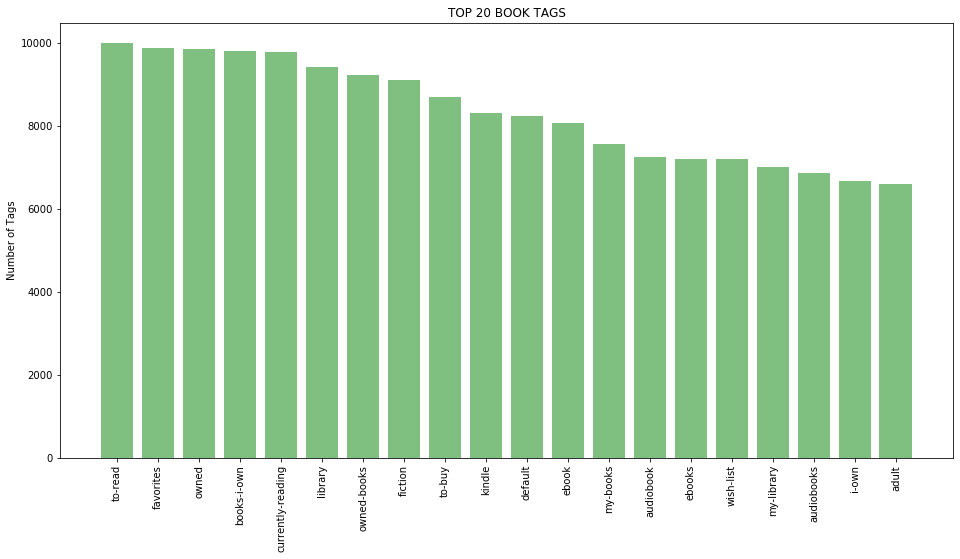

In [0]:
tags = num_tags.map(lambda line: line[0]).take(20)
y_pos = np.arange(len(tags))
tag_number = num_tags.map(lambda line: line[1]).take(20)
plt.figure(figsize=(16, 8))
plt.bar(y_pos, tag_number, align = 'center', alpha = 0.5, color = 'green')
plt.xticks(y_pos, tags, rotation = 'vertical')
plt.ylabel('Number of Tags')
plt.title('TOP 20 BOOK TAGS')
plt.show()

### Exploring To-Read Dataset

In [0]:
raw_to_read = sc.textFile('./to_read.csv')
raw_to_read.take(10)
# user_id, book_id

['9,8',
 '15,398',
 '15,275',
 '37,7173',
 '34,380',
 '34,483',
 '34,8598',
 '34,3581',
 '70,498',
 '76,4250']

In [0]:
to_read_fields = raw_to_read.map(lambda line: line.split(','))
to_read_fields.take(10)

[['9', '8'],
 ['15', '398'],
 ['15', '275'],
 ['37', '7173'],
 ['34', '380'],
 ['34', '483'],
 ['34', '8598'],
 ['34', '3581'],
 ['70', '498'],
 ['76', '4250']]

In [0]:
num_to_read_users = to_read_fields.map(lambda field: field[0]).distinct().count()
num_to_read_books = to_read_fields.map(lambda field: field[1]).distinct().count()

In [0]:
print('Number of Users: {} and Books: {} to-read'.format(num_to_read_users , num_to_read_books))

Number of Users: 48871 and Books: 9986 to-read


In [0]:
wanted_books = to_read_fields.map(lambda line: (line[1], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda line: -line[1])
wanted_books.take(20)

[('47', 2772),
 ('143', 1967),
 ('113', 1840),
 ('13', 1812),
 ('11', 1767),
 ('45', 1717),
 ('139', 1650),
 ('39', 1619),
 ('65', 1608),
 ('35', 1576),
 ('342', 1521),
 ('185', 1502),
 ('119', 1499),
 ('8', 1498),
 ('6', 1484),
 ('4', 1478),
 ('94', 1460),
 ('89', 1458),
 ('55', 1441),
 ('61', 1435)]

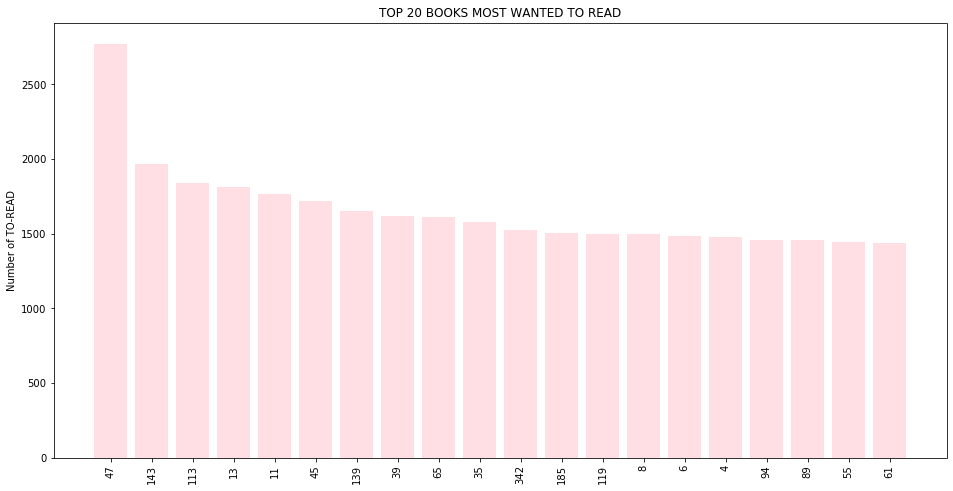

In [0]:
wanted_to_read = wanted_books.map(lambda line: line[0]).take(20)
y_pos = np.arange(len(wanted_to_read))
num_to_read = wanted_books.map(lambda line: line[1]).take(20)
plt.figure(figsize=(16, 8))
plt.bar(y_pos, num_to_read, align = 'center', alpha = 0.5, color = 'pink')
plt.xticks(y_pos, wanted_to_read, rotation = 'vertical')
plt.ylabel('Number of TO-READ')
plt.title('TOP 20 BOOKS MOST WANTED TO READ')
plt.show()

In [0]:
user_to_read = to_read_fields.groupByKey().map(lambda line: (int(line[0]), list(line[1])))
sorted_user_to_read = user_to_read.sortByKey()
sorted_user_to_read.first()

(1, ['1874', '235', '1198', '533', '112', '2058', '3334'])

In [0]:
# now we can search and show books that want to read by a particular user
sorted_user_to_read.lookup(10)

[['4369',
  '6917',
  '5556',
  '5254',
  '5104',
  '662',
  '1439',
  '1281',
  '1851',
  '385',
  '2570',
  '6',
  '6114',
  '1920',
  '7545',
  '2441',
  '3961',
  '896',
  '1082',
  '2616',
  '4510',
  '3545',
  '3059',
  '1076',
  '1220',
  '7842']]

### Exploring Book Dataset

In [0]:
raw_book = sc.textFile('./books.csv')
raw_book.take(3)
# book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,
# authors,original_publication_year,original_title,title,
# language_code,average_rating,ratings_count,
# work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url

['1|2767052|2767052|2792775|272|439023483|9.78043902348e+12|Suzanne Collins|2008.0|The Hunger Games|The Hunger Games (The Hunger Games, #1)|eng|4.34|4780653|4942365|155254|66715|127936|560092|1481305|2706317|https://images.gr-assets.com/books/1447303603m/2767052.jpg|https://images.gr-assets.com/books/1447303603s/2767052.jpg|||',
 "2|3|3|4640799|491|439554934|9.78043955493e+12|J.K. Rowling, Mary GrandPré|1997.0|Harry Potter and the Philosopher's Stone|Harry Potter and the Sorcerer's Stone (Harry Potter, #1)|eng|4.44|4602479|4800065|75867|75504|101676|455024|1156318|3011543|https://images.gr-assets.com/books/1474154022m/3.jpg|https://images.gr-assets.com/books/1474154022s/3.jpg|||",
 '3|41865|41865|3212258|226|316015849|9.78031601584e+12|Stephenie Meyer|2005.0|Twilight|Twilight (Twilight, #1)|en-US|3.57|3866839|3916824|95009|456191|436802|793319|875073|1355439|https://images.gr-assets.com/books/1361039443m/41865.jpg|https://images.gr-assets.com/books/1361039443s/41865.jpg|||']

In [0]:
book_fields = raw_book.map(lambda line: line.split('|'))
book_fields.first()

['1',
 '2767052',
 '2767052',
 '2792775',
 '272',
 '439023483',
 '9.78043902348e+12',
 'Suzanne Collins',
 '2008.0',
 'The Hunger Games',
 'The Hunger Games (The Hunger Games, #1)',
 'eng',
 '4.34',
 '4780653',
 '4942365',
 '155254',
 '66715',
 '127936',
 '560092',
 '1481305',
 '2706317',
 'https://images.gr-assets.com/books/1447303603m/2767052.jpg',
 'https://images.gr-assets.com/books/1447303603s/2767052.jpg',
 '',
 '',
 '']

In [0]:
book_data = book_fields.map(lambda line: (line[0], line[7], line[8], line[9], line[10], line[11], line[12]))
book_data.take(10)

[('1',
  'Suzanne Collins',
  '2008.0',
  'The Hunger Games',
  'The Hunger Games (The Hunger Games, #1)',
  'eng',
  '4.34'),
 ('2',
  'J.K. Rowling, Mary GrandPré',
  '1997.0',
  "Harry Potter and the Philosopher's Stone",
  "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'eng',
  '4.44'),
 ('3',
  'Stephenie Meyer',
  '2005.0',
  'Twilight',
  'Twilight (Twilight, #1)',
  'en-US',
  '3.57'),
 ('4',
  'Harper Lee',
  '1960.0',
  'To Kill a Mockingbird',
  'To Kill a Mockingbird',
  'eng',
  '4.25'),
 ('5',
  'F. Scott Fitzgerald',
  '1925.0',
  'The Great Gatsby',
  'The Great Gatsby',
  'eng',
  '3.89'),
 ('6',
  'John Green',
  '2012.0',
  'The Fault in Our Stars',
  'The Fault in Our Stars',
  'eng',
  '4.26'),
 ('7',
  'J.R.R. Tolkien',
  '1937.0',
  'The Hobbit or There and Back Again',
  'The Hobbit',
  'en-US',
  '4.25'),
 ('8',
  'J.D. Salinger',
  '1951.0',
  'The Catcher in the Rye',
  'The Catcher in the Rye',
  'eng',
  '3.79'),
 ('9',
  'Dan Brown',
  '2000

In [0]:
num_books = book_data.map(lambda line: line[0]).distinct().count()
num_authors = book_data.map(lambda line: line[1]).distinct().count()
num_years = book_data.map(lambda line: line[2]).distinct().count()
num_language = book_data.map(lambda line: line[5]).distinct().count()
num_rating = book_data.map(lambda line: line[6]).count()

In [0]:
print('Number of Books: {}, Authors: {}, Years: {}, Language: {}, Rating: {}'.format(num_books, num_authors, num_years, num_language, num_rating))

Number of Books: 10000, Authors: 4664, Years: 294, Language: 40, Rating: 10000


In [0]:
def convert_book_name(x):
    if(x == ''):
        return 'NULL'
    else:
        return x

In [0]:
convert_book_data = book_data.map(lambda line: (line[0], line[1], line[2], convert_book_name(line[3]), line[4], line[5], line[6]))
convert_book_data.first()

('1',
 'Suzanne Collins',
 '2008.0',
 'The Hunger Games',
 'The Hunger Games (The Hunger Games, #1)',
 'eng',
 '4.34')

In [0]:
clean_book_data = convert_book_data.filter(lambda line: line[3] != 'NULL')
clean_book_data.take(5)

[('1',
  'Suzanne Collins',
  '2008.0',
  'The Hunger Games',
  'The Hunger Games (The Hunger Games, #1)',
  'eng',
  '4.34'),
 ('2',
  'J.K. Rowling, Mary GrandPré',
  '1997.0',
  "Harry Potter and the Philosopher's Stone",
  "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'eng',
  '4.44'),
 ('3',
  'Stephenie Meyer',
  '2005.0',
  'Twilight',
  'Twilight (Twilight, #1)',
  'en-US',
  '3.57'),
 ('4',
  'Harper Lee',
  '1960.0',
  'To Kill a Mockingbird',
  'To Kill a Mockingbird',
  'eng',
  '4.25'),
 ('5',
  'F. Scott Fitzgerald',
  '1925.0',
  'The Great Gatsby',
  'The Great Gatsby',
  'eng',
  '3.89')]

In [0]:
clean_num_books = clean_book_data.count()
clean_num_books

9415

In [0]:
top_20_authors = clean_book_data.map(lambda line: (line[1], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda line: -line[1])
top_20_authors.take(20)

[('Stephen King', 59),
 ('Nora Roberts', 59),
 ('Dean Koontz', 45),
 ('Terry Pratchett', 42),
 ('Agatha Christie', 39),
 ('Meg Cabot', 37),
 ('James Patterson', 36),
 ('J.D. Robb', 33),
 ('David Baldacci', 33),
 ('John Grisham', 32),
 ('Laurell K. Hamilton', 30),
 ('Janet Evanovich', 29),
 ('Michael Connelly', 28),
 ('Sherrilyn Kenyon', 25),
 ('Patricia Cornwell', 25),
 ('Harlan Coben', 25),
 ('Tamora Pierce', 25),
 ('Jim Butcher', 24),
 ('Sue Grafton', 24),
 ('Anne Rice', 23)]

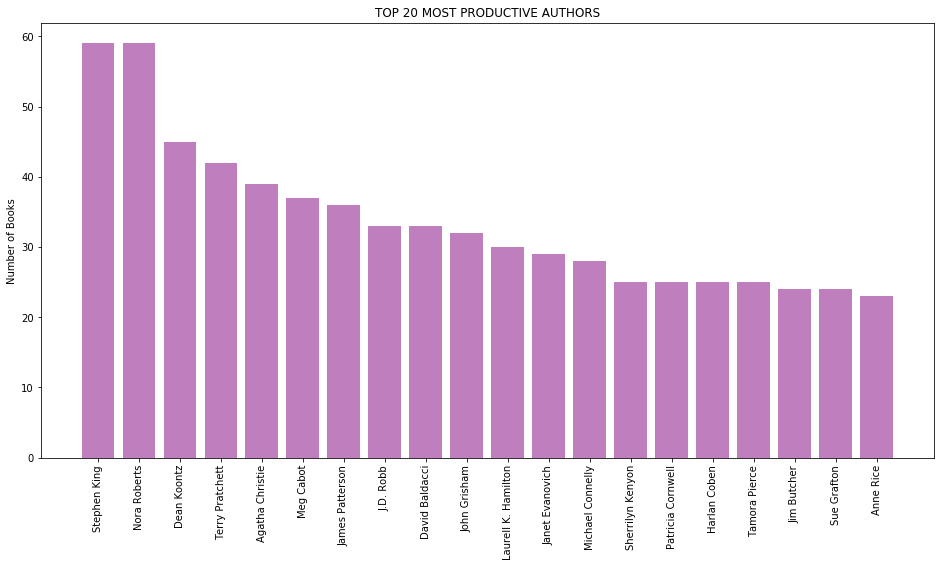

In [0]:
authors = top_20_authors.map(lambda line: line[0]).take(20)
y_pos = np.arange(len(authors))
num_authors_book = top_20_authors.map(lambda line: line[1]).take(20)
plt.figure(figsize=(16, 8))
plt.bar(y_pos, num_authors_book, align = 'center', alpha = 0.5, color = 'purple')
plt.xticks(y_pos, authors, rotation = 'vertical')
plt.ylabel('Number of Books')
plt.title('TOP 20 MOST PRODUCTIVE AUTHORS')
plt.show()

In [0]:
top_20_years = clean_book_data.map(lambda line: (line[2], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda line: -line[1])
top_20_years.take(20)

[('2012.0', 493),
 ('2011.0', 490),
 ('2013.0', 434),
 ('2010.0', 422),
 ('2009.0', 417),
 ('2014.0', 391),
 ('2008.0', 376),
 ('2006.0', 356),
 ('2007.0', 354),
 ('2005.0', 321),
 ('2004.0', 294),
 ('2003.0', 282),
 ('2015.0', 259),
 ('2001.0', 221),
 ('2002.0', 220),
 ('2000.0', 203),
 ('1999.0', 184),
 ('2016.0', 173),
 ('1998.0', 170),
 ('1997.0', 162)]

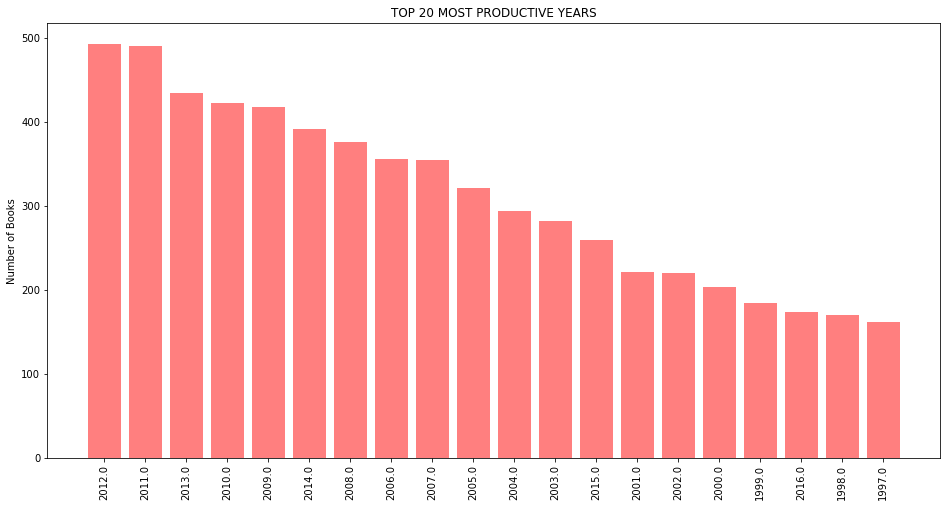

In [0]:
years = top_20_years.map(lambda line: line[0]).take(20)
y_pos = np.arange(len(years))
num_book_years = top_20_years.map(lambda line: line[1]).take(20)
plt.figure(figsize=(16, 8))
plt.bar(y_pos, num_book_years, align = 'center', alpha = 0.5, color = 'red')
plt.xticks(y_pos, years, rotation = 'vertical')
plt.ylabel('Number of Books')
plt.title('TOP 20 MOST PRODUCTIVE YEARS')
plt.show()

### Exploring Rating Dataset

In [0]:
raw_ratings = sc.textFile('./ratings.csv')
raw_ratings.take(10)

['1,258,5',
 '2,4081,4',
 '2,260,5',
 '2,9296,5',
 '2,2318,3',
 '2,26,4',
 '2,315,3',
 '2,33,4',
 '2,301,5',
 '2,2686,5']

In [0]:
rating_fields = raw_ratings.map(lambda line: line.split(','))
rating_fields.take(10)
# user_id, book_id, rating

[['1', '258', '5'],
 ['2', '4081', '4'],
 ['2', '260', '5'],
 ['2', '9296', '5'],
 ['2', '2318', '3'],
 ['2', '26', '4'],
 ['2', '315', '3'],
 ['2', '33', '4'],
 ['2', '301', '5'],
 ['2', '2686', '5']]

In [0]:
number_of_user = rating_fields.map(lambda line: line[0]).distinct().count()
print('Number of Users:', number_of_user)

Number of Users: 13123


In [0]:
number_of_books = rating_fields.map(lambda line: line[1]).distinct().count()
print('Number of Books:', number_of_books)

Number of Books: 7774


In [0]:
number_of_ratings = rating_fields.map(lambda line: line[2]).count()
print('Number of Ratings: ', number_of_ratings)

Number of Ratings:  1048575


In [0]:
ratings = rating_fields.map(lambda line: int(line[2]))
count_by_rating = ratings.countByValue()
x_axis = list(count_by_rating.keys())
y_axis = np.array([float(c) for c in count_by_rating.values()])

In [0]:
print(count_by_rating)
print(x_axis)
print(y_axis)

defaultdict(<class 'int'>, {5: 297876, 4: 376467, 3: 272805, 2: 76751, 1: 24676})
[5, 4, 3, 2, 1]
[297876. 376467. 272805.  76751.  24676.]


In [0]:
# we normalize the y-axis here to percentages
y_axis_normed = y_axis / y_axis.sum()
pos = np.arange(len(x_axis))
width = 1.0

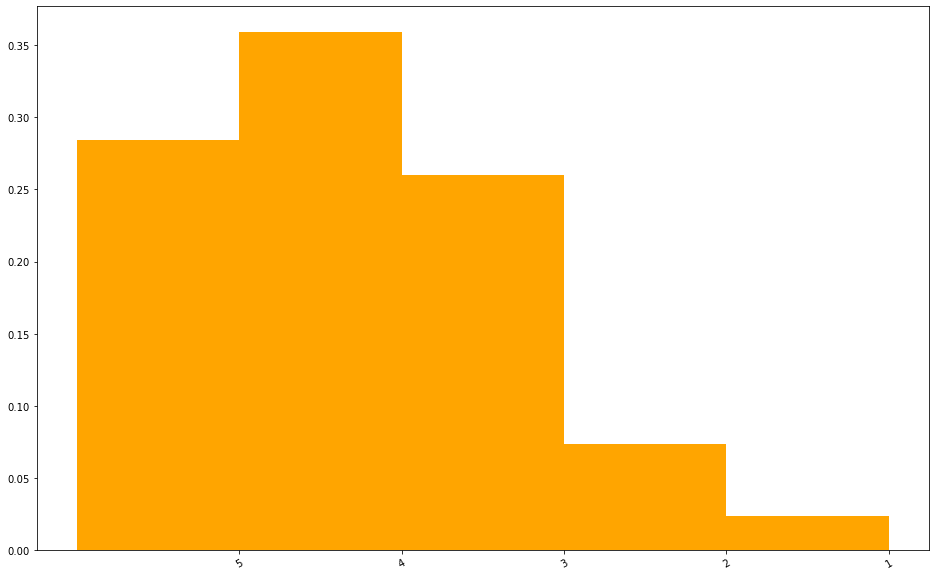

In [0]:
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis_normed, width, color='orange')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16, 10)

### Building a Recommendation Engine with Pyspark

In [0]:
rating_fields.take(10)

[['1', '258', '5'],
 ['2', '4081', '4'],
 ['2', '260', '5'],
 ['2', '9296', '5'],
 ['2', '2318', '3'],
 ['2', '26', '4'],
 ['2', '315', '3'],
 ['2', '33', '4'],
 ['2', '301', '5'],
 ['2', '2686', '5']]

In [0]:
(training_data , test_data) = rating_fields.randomSplit([0.7,0.3])

In [0]:
training_data.take(10)

[['1', '258', '5'],
 ['2', '4081', '4'],
 ['2', '260', '5'],
 ['2', '315', '3'],
 ['2', '301', '5'],
 ['2', '2686', '5'],
 ['2', '8519', '5'],
 ['4', '70', '4'],
 ['4', '264', '3'],
 ['4', '18', '5']]

In [0]:
test_data.take(10)

[['2', '9296', '5'],
 ['2', '2318', '3'],
 ['2', '26', '4'],
 ['2', '33', '4'],
 ['2', '3753', '5'],
 ['4', '388', '4'],
 ['4', '2', '5'],
 ['4', '23', '5'],
 ['4', '24', '5'],
 ['4', '35', '5']]

In [0]:
from pyspark.mllib.recommendation import ALS
from pyspark.mllib.recommendation import Rating

rating = training_data.map(lambda x: Rating(int(x[0]), int(x[1]), float(x[2])))
rating.take(10)

[Rating(user=1, product=258, rating=5.0),
 Rating(user=2, product=4081, rating=4.0),
 Rating(user=2, product=260, rating=5.0),
 Rating(user=2, product=315, rating=3.0),
 Rating(user=2, product=301, rating=5.0),
 Rating(user=2, product=2686, rating=5.0),
 Rating(user=2, product=8519, rating=5.0),
 Rating(user=4, product=70, rating=4.0),
 Rating(user=4, product=264, rating=3.0),
 Rating(user=4, product=18, rating=5.0)]

In [0]:
#rank = [10, 50, 200]
#iteration = [10, 50, 200]
#lambda_ = [0.01, 0.1]
#model_list = []
#def train_model():
    #for i in rank:
        #for j in iteration:
            #for k in lambda_:
                #model = ALS.train(rating, i, j, k)
                #model_list.append(model)
    #return model_list

In [0]:
#train_model()

### Training the Recommendation Model

### Models

In [0]:
model1 = ALS.train(rating, rank=10, iterations=10, lambda_=0.01, seed=5026)

In [0]:
model1.userFeatures().count()

13083

In [0]:
model1.productFeatures().count()

7692

### Using the Recommendation Model

In [0]:
predictionTestData = test_data.map(lambda line: (int(line[0]),int(line[1])))
predictionTestData.first()

(2, 9296)

In [0]:
predictions1 = model1.predictAll(predictionTestData)

In [0]:
predictions1.first()

Rating(user=4904, product=208, rating=4.408127481323358)

In [0]:
userId = 2
K = 10
top_k_recs = model1.recommendProducts(userId, K)
for i in top_k_recs:
    print(i)

Rating(user=2, product=9119, rating=7.197048680165635)
Rating(user=2, product=5708, rating=7.186536762843341)
Rating(user=2, product=1331, rating=6.979478532004132)
Rating(user=2, product=8259, rating=6.960093854271813)
Rating(user=2, product=9182, rating=6.868653402808722)
Rating(user=2, product=9472, rating=6.865930860694119)
Rating(user=2, product=6751, rating=6.839914185247304)
Rating(user=2, product=6591, rating=6.80030648829179)
Rating(user=2, product=3738, rating=6.784370381848685)
Rating(user=2, product=7910, rating=6.760779204581744)


### Inspecting the Recommendations

In [0]:
clean_book_data.first()

('1',
 'Suzanne Collins',
 '2008.0',
 'The Hunger Games',
 'The Hunger Games (The Hunger Games, #1)',
 'eng',
 '4.34')

In [0]:
book_titles = clean_book_data.map(lambda line: (int(line[0]), line[3])).collectAsMap()
book_titles[2]

"Harry Potter and the Philosopher's Stone"

In [0]:
books_by_user = rating.keyBy(lambda x: x.user).lookup(2)
books_by_user

[Rating(user=2, product=4081, rating=4.0),
 Rating(user=2, product=260, rating=5.0),
 Rating(user=2, product=315, rating=3.0),
 Rating(user=2, product=301, rating=5.0),
 Rating(user=2, product=2686, rating=5.0),
 Rating(user=2, product=8519, rating=5.0)]

In [0]:
len(books_by_user)

6

In [0]:
books_by_user.sort(reverse = True,key = lambda x: x.rating)
sc.parallelize(books_by_user[:10]).map(lambda rating: (book_titles[rating.product], rating.rating)).collect()

In [0]:
sc.parallelize(top_k_recs).map(lambda rating: (book_titles[rating.product], rating.rating)).collect()

### Performance Evaulation - MSE

In [0]:
allPredictedRatings1=predictions1.map(lambda line: (float (line[2])))
allPredictedRatings1.take(5)

[4.408127481323358,
 3.4678462956896485,
 5.060503153690709,
 2.4146345587381814,
 3.2269153214190736]

In [0]:
arr_allPredictedRatings = allPredictedRatings1.collect()

In [0]:
type(arr_allPredictedRatings)

list

In [0]:
actualRatings = test_data.map(lambda line: (float(line[2])))
actualRatings.take(5)

[5.0, 3.0, 4.0, 4.0, 5.0]

In [0]:
arr_allActualRatings = actualRatings.collect()

In [0]:
type(arr_allActualRatings)

list

In [0]:
sum = 0 
n = len(arr_allPredictedRatings)
for i in range (0,n):
    difference = arr_allActualRatings[i] - arr_allPredictedRatings[i]
    squared_difference = difference **2 
    sum = sum + squared_difference 
MSE = sum/n
print("The Mean Square Error : ",MSE)

The Mean Square Error :  1.6729735917812272


In [0]:
prediction_join = predictions1.map(lambda line: ((int(line[0]), int(line[1])), line[2]))
prediction_join.take(10)

[((4904, 208), 4.408127481323358),
 ((4904, 28), 3.4678462956896485),
 ((4904, 9760), 5.060503153690709),
 ((4904, 40), 2.4146345587381814),
 ((4904, 8), 3.2269153214190736),
 ((4904, 93), 4.604523056197531),
 ((4904, 9301), 3.619318409720967),
 ((4904, 209), 3.980254204322203),
 ((4904, 5), 3.558834012698509),
 ((4904, 38), 4.271363517113113)]

In [0]:
actual_join = test_data.map(lambda line: ((int(line[0]), int(line[1])), line[2]))
actual_join.take(10)

[((2, 9296), '5'),
 ((2, 2318), '3'),
 ((2, 26), '4'),
 ((2, 33), '4'),
 ((2, 3753), '5'),
 ((4, 388), '4'),
 ((4, 2), '5'),
 ((4, 23), '5'),
 ((4, 24), '5'),
 ((4, 35), '5')]

In [0]:
actual_and_predicted_ratings = actual_join.join(prediction_join)
actual_and_predicted_ratings.take(10)

[((4, 2), ('5', 4.848134130587729)),
 ((4, 24), ('5', 4.871712541968995)),
 ((1, 47), ('3', 4.043616471689718)),
 ((4, 42), ('5', 4.026873082009583)),
 ((4, 350), ('3', 3.694619116271472)),
 ((9, 317), ('4', 3.0542968889417597)),
 ((9, 81), ('1', 3.16399169305199)),
 ((9, 2193), ('2', 2.9158673788792635)),
 ((9, 181), ('5', 3.741250746825285)),
 ((9, 1301), ('2', 2.42521259024409))]